In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from src.model import dataset
from src.visualize.basic import plot_count, plot_dimension
from src.visualize.basic import plot_image_histogram, plot_t1_image, plot_t2_image
from src.utils import path as path_utils
from src.model import mri_gan

2023-02-15 21:19:28.599235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


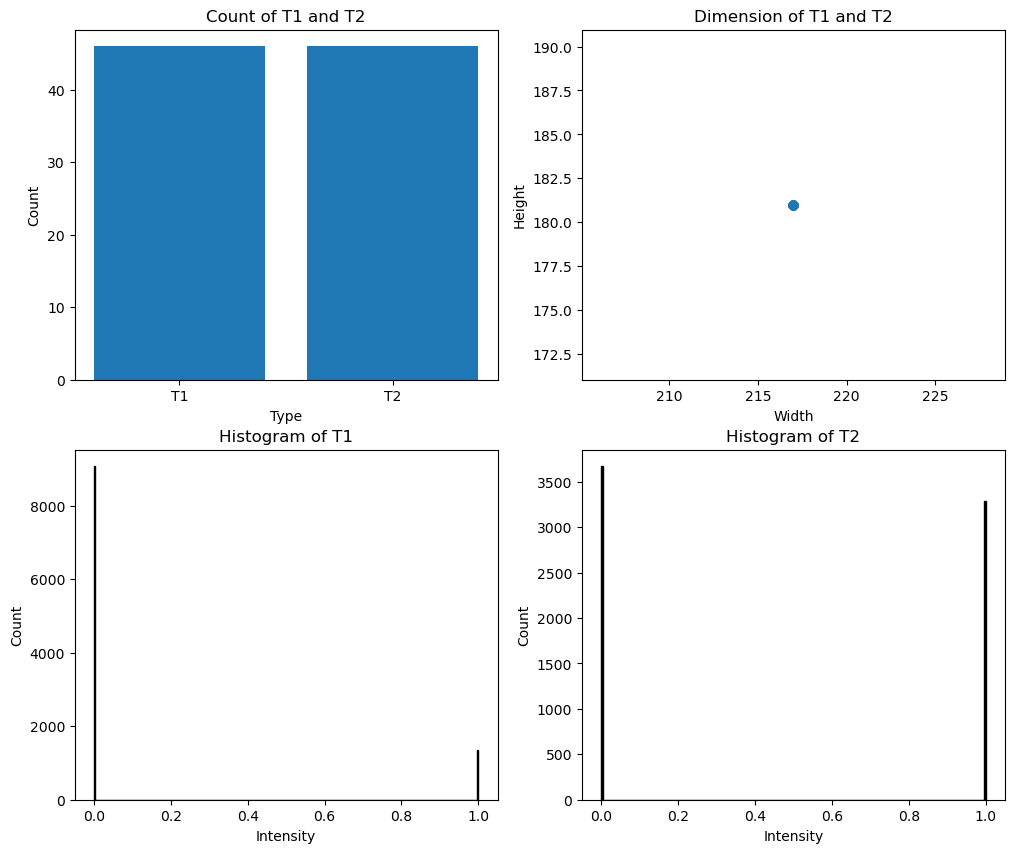

In [2]:
# sub plot for two plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
# plot count
plot_count(ax1)
# plot dimension
plot_dimension(ax2)
# plot image histogram
plot_image_histogram(ax3, ax4)
# show plot
plt.show()

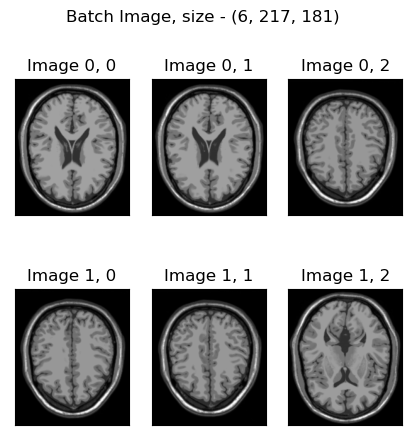

In [3]:
plot_t1_image()

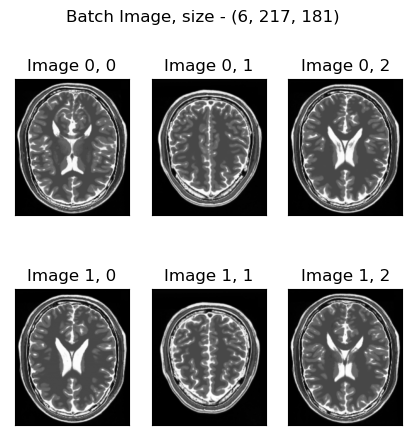

In [4]:
plot_t2_image()

In [5]:
train_dataset = dataset.load_dataset(
    x_paths=path_utils.T1_ALL_IMAGE_PATH,
    y_paths=path_utils.T2_ALL_IMAGE_PATH,
    batch_size=8,
    shuffle=True
)

2023-02-15 21:19:31.199969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-15 21:19:31.200389: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
mriGan = mri_gan.MRIGan(
    dataset_pipeline=train_dataset,
    epochs=1,
)

In [7]:
mriGan.init()

Initializing from scratch.


In [8]:
mriGan.train()

Epoch: 0
